# Project 2
## Step 1: Explore data

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:

import scipy as sp

from scipy import stats
import seaborn as sns

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
% matplotlib inline

In [2]:
#!pwd

In [3]:
df = pd.read_csv("./assets/billboard.csv") #dataset is in the assets folder

print 'The billboard data set contains: %r rows and %r columns' % (df.shape[0],df.shape[1])

The billboard data set contains: 317 rows and 83 columns


In [4]:
df.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [5]:
df.dtypes.head(10)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
dtype: object

In [6]:
df.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, data dictionary, and any interesting observations you've made thus far. 

|Variable|Type|Description|
|--|--|--|
|Year|Integer|Year of Song release|
|artist.inverted|String|Artist name|
|Track|String|Song Title|
|Time|String|Song Time|
|date.entered|String|The date the song entered the billboard chart|
|date.peaked|String|The date the song peaked|
|genre|String|Type of music|
|week:1-76|Integer, Float|how long the song stayed in the billboard chart|



After looking at the data, one can see that this data gives information on several music songs, their artist, release date, length of track, genre, date it entered the billboard, date it peaked and the position of the track in the next 76 weeks.
Since we are going to work with this data set and do some statistical analysis, it's important to see what kind of statistics are readily available.


In [7]:
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since data.describe() does not show categorical data, it's important to show statistics on the categorical data.

In [8]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index([u'artist.inverted', u'track', u'time', u'genre', u'date.entered',
       u'date.peaked'],
      dtype='object')


,artist.inverted,track,time,genre,date.entered,date.peaked
count,317,317,317,317,317,317
unique,228,316,126,10,68,53
top,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02
freq,5,2,9,137,11,17


## Step 2: Clean data

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that are too long, and check for missing values (replace them and explain rationale if it makes sense).

In [9]:
#remove the year column because the data was collected in 2000 for every track
# df=df.ix[:,1:]
# df.head(5)

In [10]:
#check for the duplicated track
pd.value_counts(df["track"])

Where I Wanna Be                       2
If You Don't Wanna Love Me             1
Just Be A Man About It                 1
With Arms Wide Open                    1
Girls Dem Sugar                        1
More                                   1
Rhythm Divine                          1
Case Of The Ex (Whatcha Gonna Do)      1
Pull Over                              1
Without You                            1
We Danced                              1
911                                    1
Left, Right, Left                      1
N 2 Gether Now                         1
I Lost It                              1
Otherside                              1
A Country Boy Can Survive              1
Rollin'                                1
Shackles (Praise You)                  1
American Pie                           1
I Think I'm In Love With You           1
Feelin' Good                           1
What You Want                          1
Been There                             1
Back At One     

In [11]:
#find the duplicated track and the artist name
df[df['track']=='Where I Wanna Be']

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
118,2000,"Jones, Donell",Where I Wanna Be,6:22,Rock,2000-04-22,2000-07-08,81,71.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2000,"Sheist, Shade",Where I Wanna Be,4:16,Rap,2000-11-11,2000-11-18,96,95.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#check which variables to remove
df.count()

year               317
artist.inverted    317
track              317
time               317
genre              317
date.entered       317
date.peaked        317
x1st.week          317
x2nd.week          312
x3rd.week          307
x4th.week          300
x5th.week          292
x6th.week          280
x7th.week          269
x8th.week          260
x9th.week          253
x10th.week         244
x11th.week         236
x12th.week         222
x13th.week         210
x14th.week         204
x15th.week         197
x16th.week         182
x17th.week         177
x18th.week         166
x19th.week         156
x20th.week         146
x21st.week          65
x22nd.week          55
x23rd.week          48
                  ... 
x47th.week           5
x48th.week           4
x49th.week           4
x50th.week           4
x51st.week           4
x52nd.week           4
x53rd.week           4
x54th.week           2
x55th.week           2
x56th.week           2
x57th.week           2
x58th.week           2
x59th.week 

In [13]:
#remove week 66 to 76
df1=df.ix[:,0:72]
df1

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN


In [14]:
#convert date.entered type (string) to datetime
df1['date.entered']=pd.to_datetime(df1['date.entered'])


In [15]:
#convert date.peaked (string) to datetime
df1['date.peaked']=pd.to_datetime(df1['date.peaked'])

In [16]:
#rename date.entered, date.peaked,artist.inverted(to artist) and weeks
# df_remove_year2.rename(columns={'date.entered':'date entered','date.peaked':'date peaked','artist.inverted':'artist','x1st.week':'week1','x2nd.week':'week2','x3rd.week':'week3','x4th.week':'week4','x5th.week':'week5','x6th.week':'week6','x7th.week':'week7','x8th.week':'week8','x9th.week':'week9','x10th.week':'week10','x11th.week':'week11','x12th.week':'week12','x13th.week':'week13','x14th.week':'week14','x15th.week':'week15','x16th.week':'week16','x17th.week':'week17','x18th.week':'week18','x19th.week':'week19','x20th.week':'week20','x21st.week':'week21','x22nd.week':'week22','x23rd.week':'week23','x24th.week':'week24','x25th.week':'week25','x26th.week':'week26','x27th.week':'week27','x28th.week':'week28','x29th.week':'week29','x30th.week':'week30','x31st.week':'week31','x32nd.week':'week32','x34th.week':'week34','x35th.week':'week35','x36th.week':'week36','x37th.week':'week37','x38th.week':'week38','x39th.week':'week39','x40th.week':'week40','x41st.week':'week41','x42nd.week':'week42','x43rd.week':'week43','x44th.week':'week44','x45th.week':'week45','x46th.week':'week46','x47th.week':'week47','x48th.week':'week48','x49th.week':'week49','x50th.week':'week50','x51st.week':'week51','x52nd.week':'week52','x53rd.week':'week53','x54th.week':'week54','x55th.week':'week55','x56th.week':'week56','x57th.week':'week57','x58th.week':'week58','x59th.week':'week59','x60th.week':'week60','x61st.week':'week61','x62nd.week':'week62','x63rd.week':'week63','x64th.week':'week64','x65th.week':'week65','x66th.week':'week66'},inplace = True)
# df_remove_year2

In [17]:
#rename date.entered, date.peaked and artist.inverted(to artist)
df1.rename(columns={'date.entered':'date entered','date.peaked':'date peaked','artist.inverted':'artist'}, inplace=True)
df1.head(5)

,year,artist,track,time,genre,date entered,date peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since I would like to see the amount of weeks the song stayed in the chart I will create a column named Weeks in data.

In [18]:
weekdata=df1.iloc[:,7:]
weeks=[]
for i in range(len(weekdata)):
    weeks.append(0)
    for a in range(0,65):
        if weekdata.iloc[i,a]>= 1:
            weeks[i] += 1
df1['Weeks on Billboard'] = weeks


Let's add a variable for the highest rank of a song in the chart
, this column will be named Top Rank.

In [19]:
TopRank = []

for i in range(len(weekdata)):
    TopRank.append(min(weekdata.iloc[i,:]))

    
    
df1['Top Billboard Rank'] = TopRank


In [20]:
df1.shape

(317, 74)

In [21]:
#remove the year column because the data was collected in 2000 for every artist
df2=df1.ix[:,1:]

In [22]:
df2.head()

,artist,track,time,genre,date entered,date peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,Weeks on Billboard,Top Billboard Rank
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,1.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1.0


In [23]:
#check for the duplicated track
pd.value_counts(df2["track"])

Where I Wanna Be                       2
If You Don't Wanna Love Me             1
Just Be A Man About It                 1
With Arms Wide Open                    1
Girls Dem Sugar                        1
More                                   1
Rhythm Divine                          1
Case Of The Ex (Whatcha Gonna Do)      1
Pull Over                              1
Without You                            1
We Danced                              1
911                                    1
Left, Right, Left                      1
N 2 Gether Now                         1
I Lost It                              1
Otherside                              1
A Country Boy Can Survive              1
Rollin'                                1
Shackles (Praise You)                  1
American Pie                           1
I Think I'm In Love With You           1
Feelin' Good                           1
What You Want                          1
Been There                             1
Back At One     

In [24]:
#find the duplicated track and the artist name
df2[df2['track']=='Where I Wanna Be']

,artist,track,time,genre,date entered,date peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,Weeks on Billboard,Top Billboard Rank
118,"Jones, Donell",Where I Wanna Be,6:22,Rock,2000-04-22,2000-07-08,81,71.0,65.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,29.0
305,"Sheist, Shade",Where I Wanna Be,4:16,Rap,2000-11-11,2000-11-18,96,95.0,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,95.0


In [25]:
# newcollist2 =collist[0:6] + map(int, newcollist)
# print newcollist2

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [26]:
df3 =pd.melt(df2, id_vars=['artist','track','time','genre','date entered','date peaked','Weeks on Billboard','Top Billboard Rank'], var_name='Week', value_name='Ranking', col_level=None)
df3

,artist,track,time,genre,date entered,date peaked,Weeks on Billboard,Top Billboard Rank,Week,Ranking
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,1.0,x1st.week,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,1.0,x1st.week,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,33,1.0,x1st.week,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,24,1.0,x1st.week,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,21,1.0,x1st.week,57.0
5,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,24,1.0,x1st.week,59.0
6,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,32,1.0,x1st.week,83.0
7,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,20,1.0,x1st.week,63.0
8,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,26,1.0,x1st.week,77.0
9,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,55,1.0,x1st.week,81.0


In [27]:
df3 = df3.dropna()
df3['Week'] = df3['Week'].apply(lambda x: x.lstrip('x').rstrip('rdndthst.week'))
df3["Week"] = df3['Week'].apply(lambda x: int(x))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [28]:
df3

,artist,track,time,genre,date entered,date peaked,Weeks on Billboard,Top Billboard Rank,Week,Ranking
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,1.0,1,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,1.0,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,33,1.0,1,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,24,1.0,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,21,1.0,1,57.0
5,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,24,1.0,1,59.0
6,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,32,1.0,1,83.0
7,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,20,1.0,1,63.0
8,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,26,1.0,1,77.0
9,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,55,1.0,1,81.0


In [29]:
df3.dtypes

artist                        object
track                         object
time                          object
genre                         object
date entered          datetime64[ns]
date peaked           datetime64[ns]
Weeks on Billboard             int64
Top Billboard Rank           float64
Week                           int64
Ranking                      float64
dtype: object

## Step 3: Visualize your data.

##### Using BOTH a Tableau Dashboard and python, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [30]:
#create a new csv file for df3 for tableau purpose
df3.to_csv('project2.csv')


In [37]:
%%HTML
<script type='text/javascript' src='https://10az.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1268px; height: 668px;'><object class='tableauViz' width='1268' height='668' style='display:none;'><param name='host_url' value='https%3A%2F%2F10az.online.tableau.com%2F' /> <param name='site_root' value='&#47;t&#47;maxime' /><param name='name' value='Project2Tableau&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showShareOptions' value='true' /></object></div>

Let's check the top performers by genre

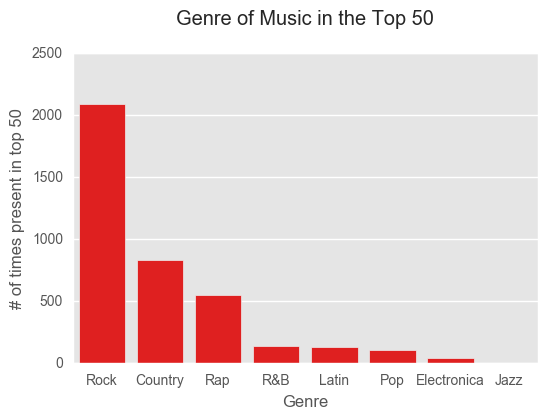

In [32]:
plt.figure(1)
top50 = df3['genre'].where(df3['Top Billboard Rank']<= 50).value_counts()
b = sns.barplot(top50.index, top50, color='red');
sns.set_style("white")
sns.plt.title("Genre of Music in the Top 50\n")
sns.plt.ylabel("# of times present in top 50")
sns.plt.xlabel("Genre")

 Let's categorize the top performances by genre.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


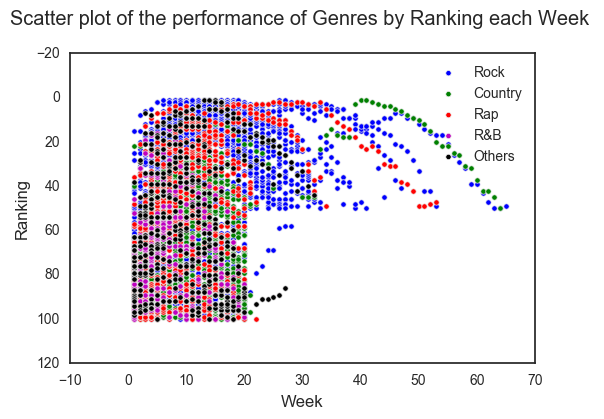

In [41]:
plt.figure(2)
df3['Hello'] = np.select([df3.genre == 'Rock', df3.genre == 'Country', df3.genre == 'Rap', df3.genre == 'R&B'],
                         ['Rock','Country','Rap','R&B'],'Others')
for color, label in zip('bgrmk', ['Rock','Country','Rap','R&B','Others']):
    subset = df3[df3.Hello == label]
    plt.scatter(subset.Week, subset.Ranking, s=15, c=color, label=str(label))
plt.title("Scatter plot of the performance of Genres by Ranking each Week \n")
plt.xlabel('Week')
plt.legend()
plt.ylabel('Ranking')
plt.gca().invert_yaxis()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement that includes risks and assumptions for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

- Guide: http://www.ceptara.com/blog/how-to-write-problem-statement
- Kaggle example: https://www.kaggle.com/c/inria-bci-challenge
- Kaggle example: https://www.kaggle.com/c/axa-driver-telematics-analysis

Having explored the data, I found several issues. The labeling of the genres is confusing. Rock could be placed in different genres. The second problem with the dataset is that by looking at the scatter plot of the performance of genres, there are a lot of missing values . Further examination of the data set I was able to plot the top rank that a song achieved in the biilboard by the amount of weeks and how long it stayed on the billboard. Looking at these two graphs it is clear that something happened at week 20. if the song is below the 50th rank it is automatically taking out of the chart. The resonning behind this is to allow for new songs to populate the lower ranks. The second scatter clearly shows that there are many songs that were taken out of the chart even though they had good performance. To have a better look at the data I propose to find a way to remove the time restriction placed upon the billboard to trully look at the performance of the songs.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a site and post your process and results. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers.

https://wordpress.com/post/maxstatsblog.wordpress.com/4

### BONUS: LinkedIn has recognized you as a DS thought leader and asked you to pen a white paper (~500 words) on 'Best Practices for Clean Data'. This will be an opinion piece read by a wide (including semi-technical) audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: Look for online resources (articles, blogs, papers, youtube, podcasts, reddit) that will help you understand the challenges and implications of dealing with big data and missing data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Always verify that the dataset values are correct and in the correct format and ready to be processed. One of the first initial approaches is to create the metadada of the data set. The metadata contains the variable name, description, variable type and the valid values. When cleaning datasets, we can find many different types of problems in the data set such as duplicate data. This can be attributed to improper data merging or user error at the time of collection. When the data set does not have proper range, the validity of the source can be questioned. Another bad example of having dirty data is when you have junk records such as fake address, email or name. Having this types of errors in your data will pollute the data set and create unecessary variable. If these information are going to be used in an email campaign you might have a high bounce rate. Another problem found in dirty data is the wrong formatting of some values such as the date. This can create problems with the data set and should be addressed before merging the datasets. Missing values that can be found in the  data sets and dealing with missing data can be very problematic. There are many different techniques we can use to identify missing data or data values that do not fall within the acceptable limits. 

Score | /24
----- | ------
Identify: Problem Statement / Hypothesis	| 		
Identify: Risks & Assumptions				| 
Acquire: Import Data Using Pandas			| 
Parse: Perform EDA Using Pandas				| 
Viz: Tableau Dashboard and Plots			| 
Mine: Determine Correlations				|
Refine: Evaluate Findings				    |
Present: Describe Results in Blog Post		|
Bonus! Present: Write a short White Paper	| /5